In [1]:
import spacy
import pandas as pd
import time
from tqdm import tqdm

### Data

In [2]:
with open('1g-word-1m-benchmark-r13output/training-monolingual.tokenized.shuffled/news.en-00001-of-00100') as sentences:
    sentences = sentences.read().split('\n')
    sentences.remove('')

In [3]:
len(sentences)

306068

### Parsing time evaluation of Spacy models

#### Case 1: en-core-web-sm

In [4]:
df = pd.DataFrame(columns=['num_sentences', 'time'])

In [5]:
# df_sm.append({'num_sentences': 400, 'time': 5}, ignore_index=True, inpl)

In [6]:
spacy.require_gpu()
nlp = spacy.load("en_core_web_sm")

In [7]:
tic = time.time()
for size in tqdm(range(60000)):
    sentence = sentences[size]
    nlp(sentence)
    tac = time.time() - tic
    data = {'num_sentences': size, 'time': tac}
    df = df.append(data, ignore_index=True)

100%|██████████| 60000/60000 [13:14<00:00, 75.50it/s]


In [8]:
df.to_csv('log_2.csv', index=False)

In [2]:
from matplotlib import pyplot as plt

In [3]:
df_sm = pd.read_csv('log_2.csv')
df_md = pd.read_csv('log_md_2.csv')
df_lg = pd.read_csv('log_lg_2.csv')

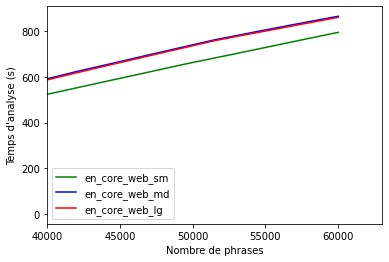

In [22]:
plt.plot(df_sm.num_sentences.to_list(), df_sm.time.to_list(), color='green', label='en_core_web_sm')
plt.plot(df_md.num_sentences.to_list(), df_md.time.to_list(), color='blue', label='en_core_web_md')
plt.plot(df_lg.num_sentences.to_list(), df_lg.time.to_list(), color='red', label='en_core_web_lg')
plt.xlabel('Nombre de phrases')
plt.ylabel('Temps d\'analyse (s)')
plt.legend()
plt.show()

In [18]:
df_sm.time.to_list()[-1]/ df_sm.num_sentences.to_list()[-1]

0.013245752695057837

In [19]:
df_md.time.to_list()[-1] / df_md.num_sentences.to_list()[-1]

0.014423872340144523

In [20]:
df_lg.time.to_list()[-1]/ df_lg.num_sentences.to_list()[-1]

0.01434190062797535